<a href="https://colab.research.google.com/github/Jeevan-Neupane/PyTorch/blob/main/02_Pytorch_Workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Pytorch Workflow

## What we are covering

In [191]:
what_we_are_covering= {
    1:"Data (Prepare and load)",
    2:"build model",
    3:"fitting the model to data(training)",
    4:"making predictions  and evaluating a model(inference)",
    5:"saving and loading a model",
    6:"putting it all together"
}


In [192]:
what_we_are_covering

{1: 'Data (Prepare and load)',
 2: 'build model',
 3: 'fitting the model to data(training)',
 4: 'making predictions  and evaluating a model(inference)',
 5: 'saving and loading a model',
 6: 'putting it all together'}

In [193]:
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__

'2.5.1+cu121'

## 01. Data (Preparing and Loading)

### To show the two steps of ML
### We are going to create some known data using the linear regression formula


In [194]:
# Create *known* parameter
weight = 0.7
bias = 0.3

start =0
end=1
step =0.02
X= torch.arange(start,end,step).unsqueeze(dim=1)
y = weight * X+bias
y[:10]

tensor([[0.3000],
        [0.3140],
        [0.3280],
        [0.3420],
        [0.3560],
        [0.3700],
        [0.3840],
        [0.3980],
        [0.4120],
        [0.4260]])

In [195]:
len(X),len(y)

(50, 50)

### Split into train and test

In [196]:
train_split  = int(0.8 *len(X));
train_split

40

In [197]:
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

X_test, y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

In [198]:
len(X_train),len(y_train),len(X_test),len(y_test)

(40, 40, 10, 10)

### Visualize our data

In [199]:
def plot_prediction(train_data=X_train,train_labels=y_train,test_data=X_test, test_labels=  y_test, predictions=None):
  plt.figure(figsize=(10,7));
  #Plot the training data
  plt.scatter(train_data, train_labels,c="b",s=4,label="Training Data");
  #Plot the test data
  plt.scatter(test_data,test_labels,c="g",s=4,label="Testing data");

  #If predictions are provided
  if predictions is not None:
    plt.scatter(test_data,predictions,c="r",s=4,label="Predictions");

  plt.legend(prop={"size":14})


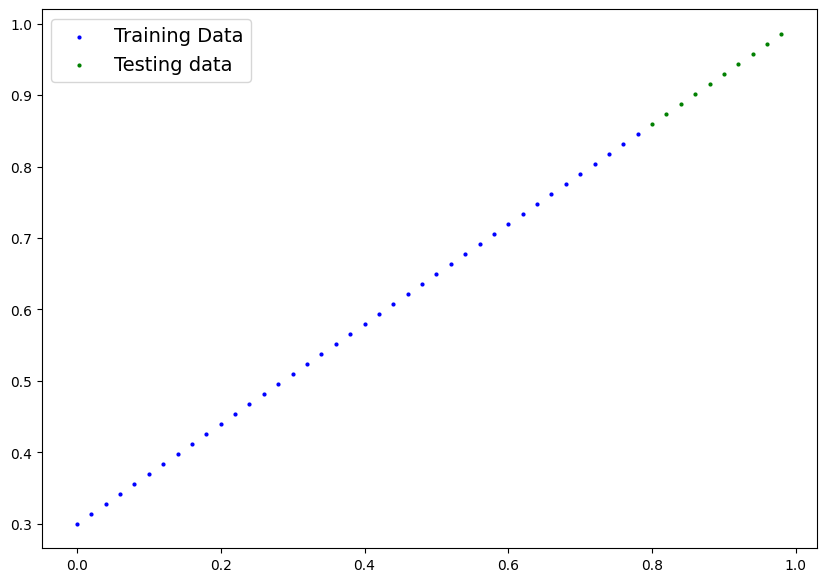

In [200]:
plot_prediction()

## 02. Building a Model For Linear Regression

In [201]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=True)
        self.bias = nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=True)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias


### Checking the contents of our pytorch model



In [202]:
torch.manual_seed(42);

model_0 = LinearRegressionModel();
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [203]:
#To get the state we cans use  .state_dict().
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

### Making Predictions using `torch.inference_mode()`

In [204]:
# Making predictions with model
with torch.inference_mode():
  y_preds= model_0(X_test);

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [205]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

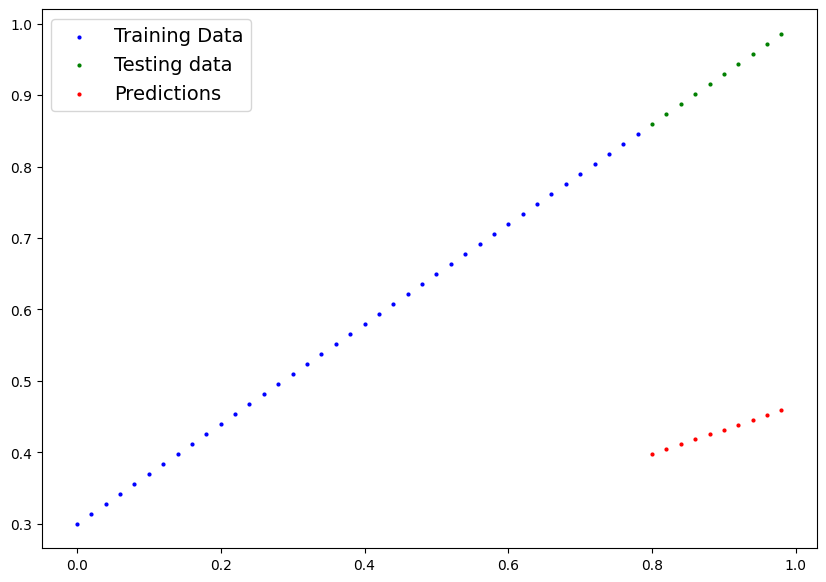

In [206]:
plot_prediction(predictions=y_preds )

## 3.Train Model

Unknown Paramter -> Know Paramter

Things we need to train:

**Loss Functoin :** A function to measure how worng the predictions of model are
**Optimizer**: Takes into acocount the loss of a model an adjust the model's paramter

### Setup a loss function

In [207]:
loss_fn= nn.L1Loss();


### Setup Optimizer

In [208]:
optimizer = torch.optim.SGD(params=model_0.parameters(),lr=0.001) #(Stochastic gradient descent) #lr= learning rate



### Training and Testing Loop

In [209]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [210]:
weight,bias

(0.7, 0.3)

In [211]:
 #Training Loop
torch.manual_seed(42)

epoch_count=[];
train_loss_values=[];
test_loss_values=[];

epochs = 1000

for epoch in range(epochs):

  #Set the model to training mode
  model_0.train();

  #1. Forward Pass
  y_pred= model_0(X_train);

  #2 . Calculate the loss
  loss = loss_fn(y_pred,y_train);
  # print(f"Loss at epoch {epoch} : {loss}");


  #3. Optimizer zero grad
  optimizer.zero_grad();

  #4. Perform backpropagation on the loss with respect tot he paramter of the model
  loss.backward();

  # 5. Step the optimizer (perform gradient descent)
  optimizer.step();

  model_0.eval(); #turns of gradient tracking

  with torch.inference_mode():
    #1. Do the forward pass
    test_pred = model_0(X_test)

    #2. Calculate the loss
    test_loss = loss_fn(test_pred,y_test);

    if epoch % 10 == 0:
      print(f"Epoch: {epoch} | Loss: {loss} | Test Loss: {test_loss}")
      epoch_count.append(epoch);
      train_loss_values.append(loss.detach().numpy());
      test_loss_values.append(test_loss.detach().numpy());



Epoch: 0 | Loss: 0.31288138031959534 | Test Loss: 0.4931890368461609
Epoch: 10 | Loss: 0.3013603389263153 | Test Loss: 0.4797181189060211
Epoch: 20 | Loss: 0.28983938694000244 | Test Loss: 0.4662471413612366
Epoch: 30 | Loss: 0.2783183455467224 | Test Loss: 0.4527761936187744
Epoch: 40 | Loss: 0.26679736375808716 | Test Loss: 0.43930521607398987
Epoch: 50 | Loss: 0.2552763819694519 | Test Loss: 0.4258342385292053
Epoch: 60 | Loss: 0.24375538527965546 | Test Loss: 0.41236335039138794
Epoch: 70 | Loss: 0.232234388589859 | Test Loss: 0.398892343044281
Epoch: 80 | Loss: 0.22071340680122375 | Test Loss: 0.38542139530181885
Epoch: 90 | Loss: 0.2091923952102661 | Test Loss: 0.3719504475593567
Epoch: 100 | Loss: 0.19767141342163086 | Test Loss: 0.35847947001457214
Epoch: 110 | Loss: 0.18615040183067322 | Test Loss: 0.34500852227211
Epoch: 120 | Loss: 0.17462942004203796 | Test Loss: 0.33153754472732544
Epoch: 130 | Loss: 0.16310855746269226 | Test Loss: 0.3180667459964752
Epoch: 140 | Loss: 0.

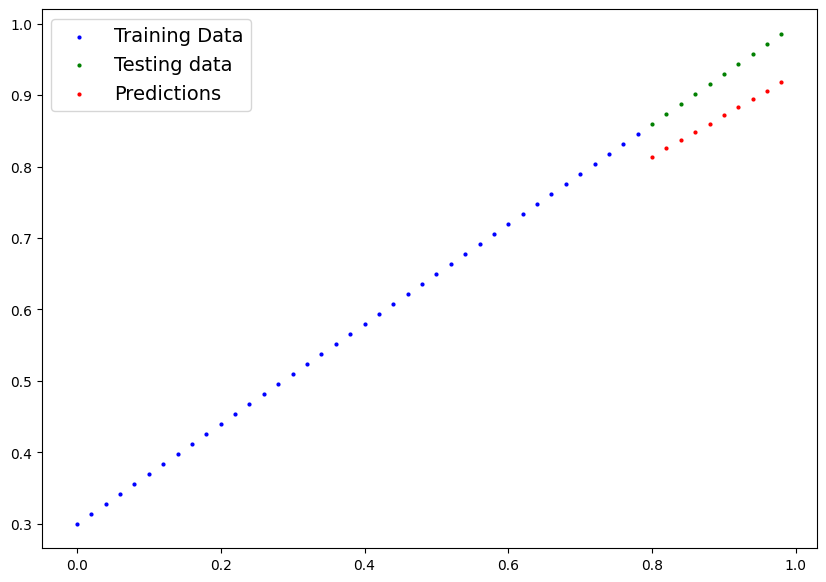

In [212]:
with torch.inference_mode():
  y_preds= model_0(X_test);


plot_prediction(predictions=y_preds)

In [213]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.5788])), ('bias', tensor([0.3509]))])

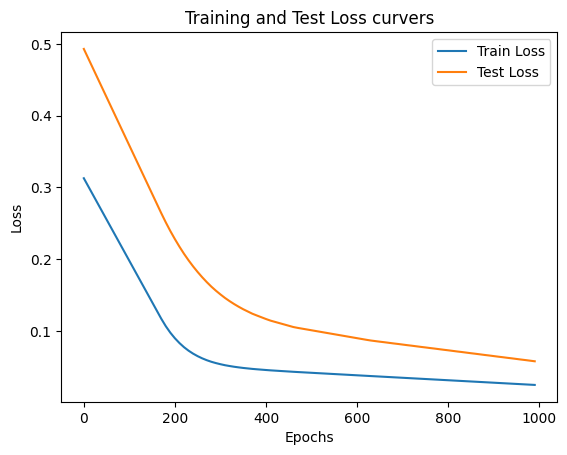

In [214]:
plt.plot(epoch_count,train_loss_values,label="Train Loss");
plt.plot(epoch_count, test_loss_values,label="Test Loss");
plt.title("Training and Test Loss curvers");
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()
